In [ ]:
pip install nltk

In [ ]:
import pandas as pd  # Import the pandas library for data manipulation and analysis

# Read the CSV file containing email data into a pandas DataFrame
# Replace "emails.csv" with the path to your CSV file if it's in a different location
df = pd.read_csv("emails.csv")

# Print the first 5 rows of the DataFrame to verify the data has been loaded correctly
df.head()

,Spam,Message
0,0,Please call me at 8
1,1,Free money is available for you
2,0,I study he studies they are students I studied...
3,1,I am working at office now to 9 evening
4,0,U dun say so early hor... U c already then say...


In [ ]:
# Import necessary libraries
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Download required NLTK data files
nltk.download('punkt')  # For word tokenization
nltk.download('stopwords')  # For stopword removal
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
def clean_post(post: str) -> str:
    """
    Cleans a post by removing punctuation, stopwords.

    Args:
        post (str): The input text/post to clean.

    Returns:
        str: The cleaned text.
    """
    # Convert the text to lowercase
    post = post.lower()

    # Remove punctuation
    post = post.translate(str.maketrans('', '', string.punctuation))

    # Tokenize the text
    words = word_tokenize(post)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]

    # Remove numbers from filtered words using regex
    filtered_words = [re.sub(r'\d+', '', word) for word in filtered_words]

    # stemmer the words
    stemmer = PorterStemmer()
    cleaned_words = [stemmer.stem(word) for word in filtered_words]

    # Join the words back into a single cleaned string
    return ' '.join(cleaned_words)

In [ ]:
# Example usage
post = "This is an example post! It contains punctuation, stopwords, and other unnecessary text."
cleaned_post = clean_post(post)
print("Original Post:", post)
print("Cleaned Post:", cleaned_post)

Original Post: This is an example post! It contains punctuation, stopwords, and other unnecessary text.
Cleaned Post: exampl post contain punctuat stopword unnecessari text


In [ ]:
# add a column new
df["processed_message"] = df["Message"].apply(clean_post)

df.head()

,Spam,Message,processed_message
0,0,Please call me at 8,pleas call
1,1,Free money is available for you,free money avail
2,0,I study he studies they are students I studied...,studi studi student studi yesterday
3,1,I am working at office now to 9 evening,work offic even
4,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say


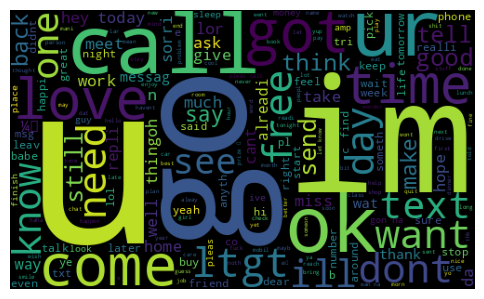

In [ ]:
# Filter the DataFrame to include only rows where the 'spam' column is equal to 1
# This creates a new DataFrame `df_spam` containing spam-related data
df_spam = df[df['Spam'] == 1]

# Convert the 'processed_message' column to a string format (in case it contains non-string types)
spam_words_list = df['processed_message'].astype(str)

# Join all rows in the 'processed_message' column into a single string separated by spaces
spam_words_str = ' '.join(spam_words_list)

# Generate a WordCloud from the combined string of 'processed_message'
spam_wordcloud = WordCloud(width=500, height=300).generate(spam_words_str)

# Set the figure size for the WordCloud plot
plt.figure(figsize=(6, 4))

# Display the generated WordCloud image
plt.imshow(spam_wordcloud)

# Remove the axis for better visualization
plt.axis("off")

# Show the WordCloud plot
plt.show()

In [ ]:
# Assuming df_spam is a DataFrame containing the dataset with 'processed_message' and 'Spam' columns
corpus = df_spam['processed_message']  # Extract processed text messages from the dataset

max_features = 100  # Set the maximum number of features for vectorization

# *** Using CountVectorizer to Convert Text into Numerical Vectors ***
count_vectorizer = CountVectorizer(max_features=max_features)  # Initialize CountVectorizer
vectors = count_vectorizer.fit_transform(corpus)  # Convert the corpus into a numerical feature matrix

# *** Using TfidfVectorizer to Create TF-IDF Features ***
tfidf_vectorizer = TfidfVectorizer(max_features=max_features)  # Initialize TfidfVectorizer
tfidf_vectors = tfidf_vectorizer.fit_transform(corpus)  # Transform the corpus into TF-IDF vectors

In [ ]:
# Convert CountVectorizer output to array for use in a machine learning model
X = vectors.toarray()

# Target variable (Spam/Not Spam)
y = df_spam['Spam']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)  # Use 42 for reproducibility

In [ ]:
# *** Neural Network Model Creation ***
# Initialize a Sequential neural network model
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))  # Input layer with 64 neurons
model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons
model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 neuron (for binary classification)

# Compile the neural network model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training dataset
model.fit(X_train, y_train, epochs=10, batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3312 - loss: 0.7534
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.4583
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.2649 
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1351 
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0698 
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0412 
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0273 
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0186 
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0150 
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0124 


In [ ]:
# *** Model Prediction and Evaluation ***
y_pred_prob = model.predict(X_test)  # Predict probabilities
y_pred = np.round(y_pred_prob)  # Round probabilities to get binary predictions (Spam/Not Spam)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy of the model

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [ ]:
# *** TF-IDF Based Training (Similar Steps with TF-IDF Features) ***

# Use TF-IDF vectors for inputs
X = tfidf_vectors.toarray()

# Target variable
y = df_spam['Spam']

# Train-test split (repeated for TF-IDF features)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)  # Use 42 for reproducibility

In [ ]:
# Define the same model structure
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))  # Input layer with 64 neurons
model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons
model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 neuron (binary classification)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the TF-IDF based model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4492 - loss: 0.6947
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.5438 
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3669 
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.1898
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0813
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0339 
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0177
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0127
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0088
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0067


In [ ]:
# Make predictions with the TF-IDF based model
y_pred_prob = model.predict(X_test)  # Predict probabilities
y_pred = np.round(y_pred_prob)  # Convert probabilities to binary predictions

# Calculate accuracy for TF-IDF based model
accuracy1 = accuracy_score(y_test, y_pred)  # Calculate model accuracy

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [ ]:
# *** Example Message Classification ***

# Example input message to classify
message = "call to get free prize one million dollars"

# Preprocess the message using the same cleaning function as used for the dataset
processed_message = clean_post(message)

# Transform the cleaned message to TF-IDF vector
vectors = tfidf_vectorizer.transform([processed_message])  # Transform message to a sparse matrix
tfidf_vector = vectors.toarray()  # Convert sparse matrix to dense array

# Predict whether the message is Spam (1) or Not Spam (0)
prediction = model.predict(tfidf_vector)  # Predict spam probability using the trained model
y_pred = np.round(prediction)  # Convert the probability to 0 or 1 (binary decision)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [ ]:
# Print the final prediction (1 -> Spam, 0 -> Not Spam)
print(y_pred)

[[1.]]
